In [3]:
rnorm(1, 9, 3)
rnorm(1, 17, 3)


[1] 7.002306

In [6]:
rnorm(1, 17, 3)

[1] 15.04782

In [27]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Data Types and Hypothesis Tests: continous Data

* Used to assess both the central tendency and variability.
* Some useful tests:

| What you’re testing | Hypothesis Test |
|---------------------|-----------------|
| One mean to reference value | 1-sample t-test |
| Means for two groups | 2-sample t-test, paired t-test|
| Means for at least three groups | One-Way ANOVA, Two-Way ANOVA |
| Compare specific groups from ANOVA | Post hoc tests |
| One standard deviation to reference | 1 Sample Variance Test|
| Standard deviations for two groups |  2 Sample Variance Test|
| Correlation between two contin- uous variables | Pearson’s correlation coefficient|
| Shape of distribution | Distribution tests for continuous data |
| Presences of outlies Medians | Outlier tests|









### Data Types and Hypothesis Tests: Binary, Count and Categorical Data

* Used to assess both the central tendency and variability.
* Some useful tests:

| What you’re testing | Hypothesis Test |
|---------------------|-----------------|
| One proportion to a target | 1 Proportions Test |
| Proportions for two groups |  2 Proportions Test |
| One rate to a target | 1 Sample Poisson Rate Test |
| Rates for two groups | 2 Sample Poisson Rate Test |
| Distribution test | Poisson Goodness-of-Fit Test |
| Association between two variables | Chi-Squared Test of Independence categorical variables| 
| Do the proportions of values follow a hypothesized distribution? |  Chi-Square Goodness-of-Fit test


### $\chi^2$ goodness-of-fit test

* The $\chi^2$ goodness-of-fit test is one of the oldest hypothesis tests for categorical data.

* Cateorical data refers to data with a "nominal scale"


### The Card Radnomness Test
 * Ask 200 people to mentally choose two card suits. Is the choice random?
 * I.e., do people pickle the second card suit radnomly (p=uniform) or is the choice related to the first choice
* About Rdata Files are a dump of your workspace
  * You can save your worksapce to an Rdata file suing `save.image(file="filename.RData") `
  * Load data using `load(file="filename.RData") `



In [8]:
load("data/randomness.Rdata")

In [10]:
observed <- table( cards$choice_2 )
observed


   clubs diamonds   hearts   spades 
      68       44       41       47 

### How do we reprodcude Similar Data

* The Observed frequncies $O = (O_1, O_2, O_3, O_4) = (68, 44, 41, 47)$
* How do we sample similar data in R?
  * Which distribution should we use?
  * Recall, this is simply a generalization of (coin flip)

In [11]:
n = 1
size = 200
prob = c(1/4, 1/4, 1/4, 1/4)
rmultinom(n, size, prob)

48
47
57
48


### Pearson’s $\chi^2$ goodness of fit test

* Our assumtpion is that the card (species, or whatever other counts) are not uniformly represented.

    * $H_0$: All four suits are chosen with equal probability p=0.25

    * $H_A$: At least one of the suit-choice probabilities $\ne$ 0.25

* How to test this hypothesis?

* The same test we ran manually

  * Sample uniformly represented card.

  1. Compute some test statistics

  2. Plot where the observed statistic occurs using the data from the null as a reference

   2.1 compute a p-value

* This is exactly wha the $\chi^2$ goodness of fit tests

 * $H_0$: $P = (25,.25,.25,.25)$

 * $H_A$: $P \ne (.25,.25,.25,.25)$



### The “goodness of fit” test statistic

* Similar to what we've done via simulation, if we want to test `H0` against `H1`, we’re going to need a test statistic.
  * Measures how “close” the data are to the null hypothesis. 
      * If the data do not resemble what you’d “expect” to see if the null hypothesis were true, then it probably isn’t true.
  * What are the expected frequencies?

In [12]:
### What is this called in R?
probabilities <- c(clubs = .25, diamonds = .25, hearts = .25, spades = .25)
probabilities

clubs diamonds   hearts   spades 
    0.25     0.25     0.25     0.25

In [13]:
expected= 200 * probabilities
expected


clubs diamonds   hearts   spades 
      50       50       50       50

### Deriving a Test Statistic

Objetive: compare the expected (Ei) wiht observed vals in each category

![](https://www.dropbox.com/s/61z3mx4g33qrq19/obs_exp.png?dl=1)

* Sign should not matter + 14 hearts and -15 clubs should be equivalent to -14 hearts and +15 clubs
  * Easy: we can just count the squared error
* We' also interested in contextualizing that error. 
  * +14 with regards to what
  * Let's divide by the expectation so we can also represent this error in terms of units representing how far form the expectation it is. 
  * The total distance we're off by is the sum of all of these.




In [15]:
observed


   clubs diamonds   hearts   spades 
      68       44       41       47 

In [14]:
observed - expected


   clubs diamonds   hearts   spades 
      18       -6       -9       -3 

In [17]:
(observed - expected)^2 / expected


   clubs diamonds   hearts   spades 
    6.48     0.72     1.62     0.18 

In [19]:
sum((observed - expected)^2 / expected)

[1] 9

### The $\chi^2$ Statistic

* What we Computed Above is the $\chi^2$ statistic

$$
\chi^2 = \sum_{i=1}^{k} \frac{(E_i - O_i)^2}{E_i}
$$

* Where $k$ is the number of categories
 
* Similar to our similations with the distance, it's easy to observe that large vlaue of $\chi^2$ are in favor of the alternaitves, i.e.:

* If $\chi^2$ is small, then $O_i$  and $E_i$ are close (Null hypothesis is okay)
* If $\chi^2$ is large, then Oi  cannot come from the same distribution as Ei (the uniform here)

* Is $\chi^2 = 9$ large or small? 


### The sampling distribution of the GOF statistic

* What should $\chi^2$ values look like if we sample randomly form the uniform. 
  * i.e., what does the sampling distribution of $\chi^2$ looks like

* Recall, that essentially, $O_i$, observed frequency for a category $i$ is distributed according to a binomial
$$
O_i \sim \text{Binomial}(P_i, N)
$$

* For large values of N and when $P_i$ isn’t too close to 0 or 1, the Central Limit Theorem say that the  the binomial is similar to the Gaussian 


In [6]:
N = 200
p = 0.4



In [7]:
rbinom(1, N, p)

[1] 84

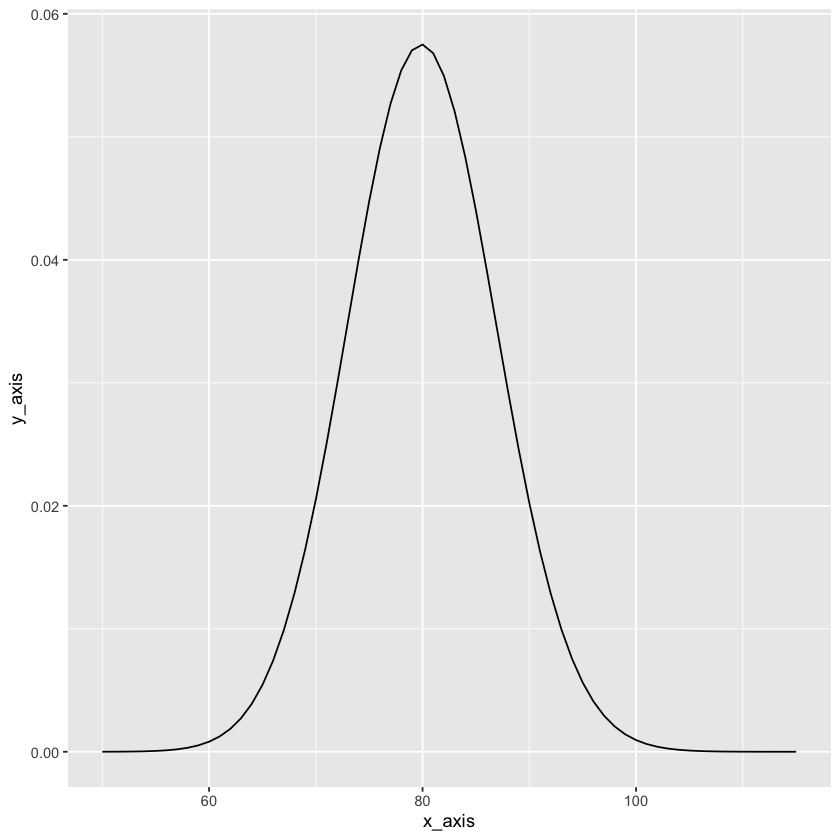

In [14]:
x_axis = c(50:115)
y_axis = dbinom(x_axis, N, p)

ggplot() +
 geom_line(aes(x_axis, y_axis))

# From the Gaussian to the $\chi^2$

* When $E_i = N \times Pi$ is large, then $O_i$ follows a Gaussian

* If $O_i$ is normally distributed, then so is $(O_i - E_i) / \sqrt{E_i}$

  * Here, I simply removed the square by taking the square root

* The test consists of a sum of $k$ terms $(O_i - E_i) / \sqrt{E_i}$

* If you have a collection of variables that are normally distributed, square their values and then adding them up yields a quantity that has a chi-square distribution

 * The $\chi^2$ distribution is typically used to represent errors.

 * The parameter of a $\chi^2$ is its degrees of freedom ($df$)


In [4]:
rchisq(5, df=3)

[1] 2.9278716 0.8327269 3.4363436 4.2407839 1.3667742

In [16]:
rchisq(5, df=100)

[1]  87.18022 135.24508  99.88324 101.90970  88.66557

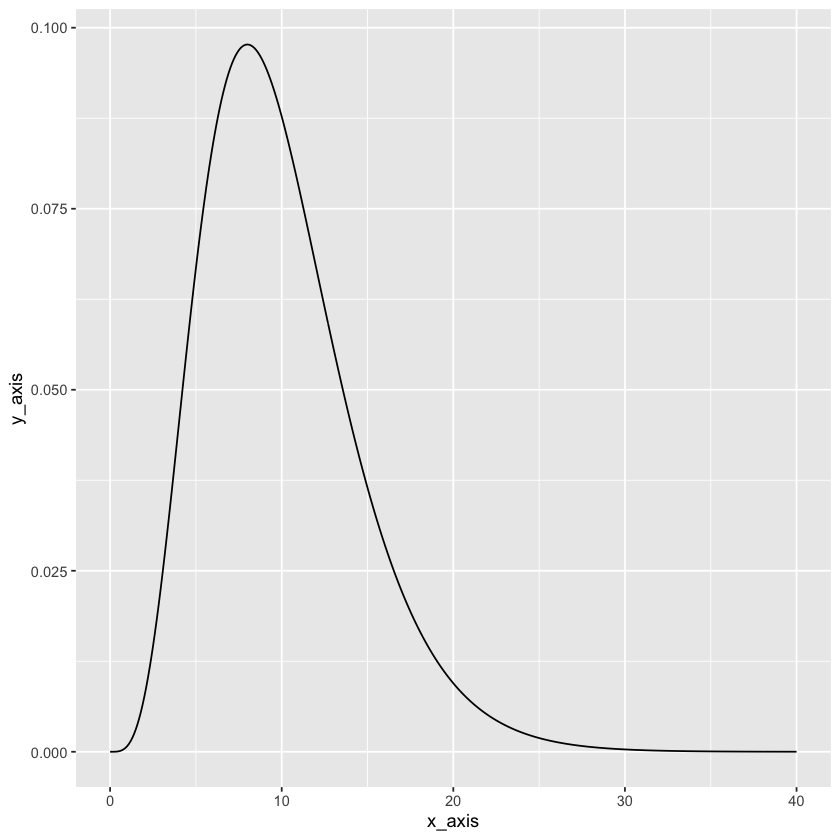

In [17]:
x_axis = seq(0,40, 0.1)
y_axis = dchisq(x_axis, df=10)

ggplot() +
 geom_line(aes(x_axis, y_axis))

### Degrees of Freedom of the $\chi^2$

* If you have a collection of variables that are normally distributed, square their values and then add them up yields a quantity that has a chi-square distribution

  * If the number of items you're adding up is $k$, then the degrees of freedom for the resulting chi-square distribution is $k-1$

* What matters here is the number of independent items we're adding up.

  * Here, only k-1 categories are independent, since with k-1 categories we can infer the value of the last category

    * The “degrees of freedom” is actually a bit of a messy concept and the above is an oversimplification since degrees of freedom may not even be a whole number.



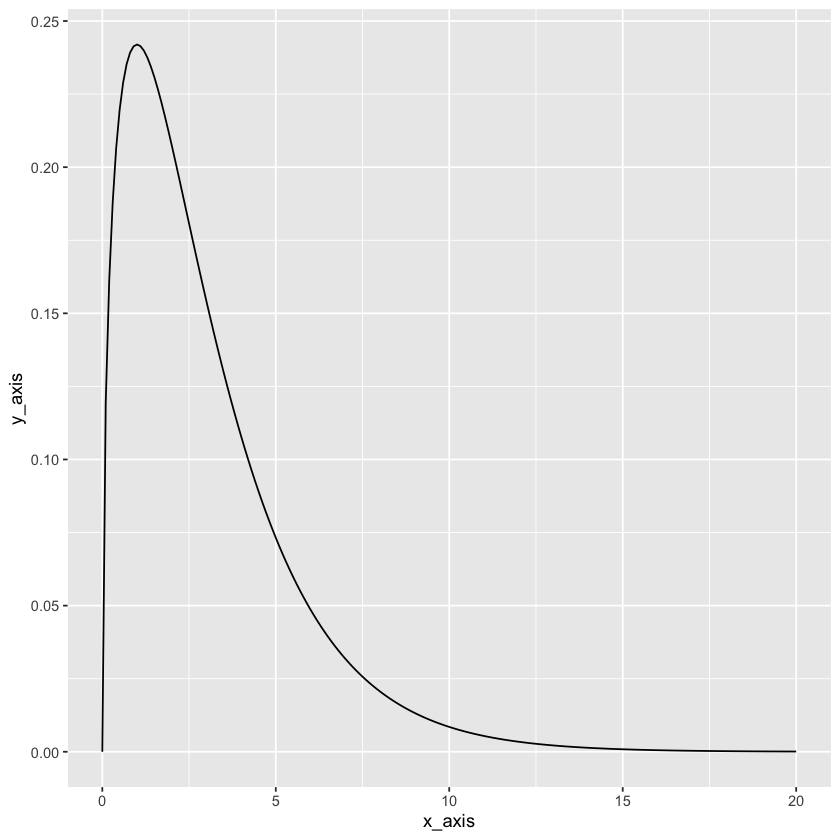

In [7]:
x_axis = seq(0, 20, 0.1)
y_axis = dchisq(x_axis, df=3)

ggplot() +
 geom_line(aes(x_axis, y_axis))

[1] 1

### Cumulative desity function 
* The `pchisq`, like `pnorm` or `ppois`, returns the value of the cumulative density function (cdf) 
* Given a random variable x and some parameters (here df)


```
pchisq (x, df=m)
```

In [22]:
pchisq(0, df=3)
# same as pchisq(0, 3)

[1] 0

In [23]:
pchisq(20, df=3)

[1] 0.9998303

In [24]:
x_axis

[1]  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0  1.1  1.2  1.3  1.4
 [16]  1.5  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
 [31]  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.0  4.1  4.2  4.3  4.4
 [46]  4.5  4.6  4.7  4.8  4.9  5.0  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
 [61]  6.0  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.0  7.1  7.2  7.3  7.4
 [76]  7.5  7.6  7.7  7.8  7.9  8.0  8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
 [91]  9.0  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.0 10.1 10.2 10.3 10.4
[106] 10.5 10.6 10.7 10.8 10.9 11.0 11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9
[121] 12.0 12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.0 13.1 13.2 13.3 13.4
[136] 13.5 13.6 13.7 13.8 13.9 14.0 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9
[151] 15.0 15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16.0 16.1 16.2 16.3 16.4
[166] 16.5 16.6 16.7 16.8 16.9 17.0 17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9
[181] 18.0 18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.0 19.1 19.2 19.3 19.4
[196] 19.5 19.6 19.7 19.8 19.9 20.0

In [25]:
probs = pchisq(x_axis, 3)
probs

[1] 0.000000000 0.008162576 0.022410702 0.039971520 0.059757505 0.081108588
  [7] 0.103567627 0.126796051 0.150532967 0.174572191 0.198748043 0.222925916
 [13] 0.246995688 0.270866924 0.294465269 0.317729670 0.340610180 0.363066204
 [19] 0.385065064 0.406580822 0.427593296 0.448087237 0.468051629 0.487479093
 [25] 0.506365377 0.524708917 0.542510453 0.559772706 0.576500083 0.592698433
 [31] 0.608374824 0.623537351 0.638194973 0.652357355 0.666034751 0.679237879
 [37] 0.691977828 0.704265968 0.716113869 0.727533242 0.738535870 0.749133564
 [43] 0.759338115 0.769161252 0.778614613 0.787709713 0.796457918 0.804870428
 [49] 0.812958251 0.820732196 0.828202856 0.835380596 0.842275550 0.848897609
 [55] 0.855256421 0.861361383 0.867221642 0.872846094 0.878243380 0.883421894
 [61] 0.888389775 0.893154919 0.897724973 0.902107347 0.906309210 0.910337496
 [67] 0.914198913 0.917899940 0.921446840 0.924845657 0.928102228 0.931222181
 [73] 0.934210947 0.937073764 0.939815676 0.942441548 0.944956064 0.947363734
 [79] 0.949668902 0.951875748 0.953988294 0.956010410 0.957945817 0.959798094
 [85] 0.961570681 0.963266885 0.964889884 0.966442731 0.967928359 0.969349585
 [91] 0.970709113 0.972009542 0.973253364 0.974442972 0.975580663 0.976668640
 [97] 0.977709017 0.978703822 0.979655001 0.980564419 0.981433865 0.982265052
[103] 0.983059626 0.983819163 0.984545173 0.985239103 0.985902340 0.986536215
[109] 0.987141999 0.987720913 0.988274124 0.988802753 0.989307871 0.989790504
[115] 0.990251634 0.990692203 0.991113111 0.991515221 0.991899358 0.992266312
[121] 0.992616839 0.992951664 0.993271477 0.993576942 0.993868694 0.994147337
[127] 0.994413454 0.994667598 0.994910302 0.995142072 0.995363395 0.995574735
[133] 0.995776536 0.995969225 0.996153206 0.996328868 0.996496584 0.996656707
[139] 0.996809578 0.996955521 0.997094847 0.997227852 0.997354820 0.997476022
[145] 0.997591716 0.997702150 0.997807562 0.997908176 0.998004210 0.998095869
[151] 0.998183351 0.998266844 0.998346529 0.998422577 0.998495153 0.998564414
[157] 0.998630510 0.998693584 0.998753774 0.998811209 0.998866016 0.998918312
[163] 0.998968213 0.999015827 0.999061258 0.999104605 0.999145963 0.999185423
[169] 0.999223071 0.999258990 0.999293258 0.999325950 0.999357140 0.999386894
[175] 0.999415280 0.999442359 0.999468190 0.999492832 0.999516339 0.999538761
[181] 0.999560150 0.999580553 0.999600014 0.999618577 0.999636282 0.999653171
[187] 0.999669279 0.999684642 0.999699296 0.999713272 0.999726601 0.999739314
[193] 0.999751439 0.999763002 0.999774030 0.999784547 0.999794577 0.999804142
[199] 0.999813263 0.999821962 0.999830258

In [78]:
which(probs > 0.95)

[1]  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
 [19]  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 [37] 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 [55] 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 [73] 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 [91] 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
[109] 188 189 190 191 192 193 194 195 196 197 198 199 200 201

In [81]:
index = which(probs > 0.95)[1]
index

[1] 80

In [84]:
x_axis[index]
probs[index]

[1] 7.9

[1] 0.9518757

In [85]:
qchisq( p = .95, df = 3 )

[1] 7.814728

In [21]:
pchisq(20, df=3, lower.tail = FALSE)

[1] 0.0001697424

In [25]:
# Give me the area under the upper tail instead
pchisq(9, df=3, lower.tail = FALSE)

[1] 0.02929089

In [22]:
observed


   clubs diamonds   hearts   spades 
      68       44       41       47 

In [23]:
observed


   clubs diamonds   hearts   spades 
      68       44       41       47 

In [24]:
# using R's chisq.test
print(observed)
chisq.test( x = observed )


   clubs diamonds   hearts   spades 
      68       44       41       47 



	Chi-squared test for given probabilities

data:  observed
X-squared = 9, df = 3, p-value = 0.02929


In [139]:
# change the null hypothesis,
chisq.test( x = observed, p = c(.2, .3, .3, .2) )


	Chi-squared test for given probabilities

data:  observed
X-squared = 4.7417, df = 3, p-value = 0.1917


### The $\chi^2$ test of independence (or association)

* Suppose you'd like to know whether a site is more conducive to the growth of some species. You conduct a test where you introduce species to sites A and B and observe whether it lives or dies, or is unhealthy

* Note here that:
  * We're working categorical data (site vs. health status)
  * We have count data

  * We're interested in whether there is an association between the site and grow status
  
* The results are stored in experiment.csv


In [28]:
data = read_csv("data/experiment.csv", col_types = cols( site = col_factor(), condition=col_factor()))
head(data)


EntryID,site,condition
<dbl>,<fct>,<fct>
1,siteA,dies
2,siteB,unhealthy
3,siteB,unhealthy
4,siteB,unhealthy
5,siteA,unhealthy
6,siteB,dies


In [29]:
head(select(data, -"EntryID"))

site,condition
<fct>,<fct>
siteA,dies
siteB,unhealthy
siteB,unhealthy
siteB,unhealthy
siteA,unhealthy
siteB,dies


In [30]:
data = select(data, -"EntryID")
summary(data)

    site        condition  
 siteA:87   dies     : 43  
 siteB:93   unhealthy:109  
            lives    : 28  

In [31]:
freqs <- xtabs(~condition + site, data)
freqs

           site
condition   siteA siteB
  dies         30    13
  unhealthy    44    65
  lives        13    15


* 180 entries animal accross sites A or B 
  * 87 `siteA` and 97 `siteB`
![](https://www.dropbox.com/s/q2i36mlphpyel3w/xtab.png?dl=1)
* The question we are interested in tacling pertains to whether or not the distribution of the datat the same across both sites. is site independent of health status?
  * Are the proprtions of lives, dies, or unhealthy the same across both sites


### Constructing our hypothesis test

![](https://www.dropbox.com/s/7nl9nnq8gpyattp/xtab_generic.png?dl=1)

* $O_{ij}$ is a count (observed frequency) of the number of respondents that are at a site (siteA or siteB) which lead to condition i (lives, dies, unhealth)
* The total number of observations is written N, as usual.
* $R_i$ to denote the row totals
* $C_j$ to denote the column totals 



### Constructing our hypothesis test

* If both sites yield the same outcomes, then probability of dies is equal in both sites
  * by the same token, prob of healthy is also similar in both site
  * by the same token, prob of lives also similar in both site


* $H_0$: All of the following are true:
    *  $P_{11}$ = $P_{12}$ (same probability of dies),
    *  $P_{21}$ = $P_{22}$ (same probability of unhealthy).
    *  $P_{31}$ = $P_{32}$ (same probability of lives).
    
* We denote $p_i$ where $i \in {1,2,3}$ as the prob of dies, unhealthy or lives respectively in eiher site.

### Test Statistic

* Unlike goodness of fit test, the null hypothesis doesn’t actually specify a particular value for $p_i$. 
  * We can estimate it from the data
  * If 28 out of 180 spcies lives, then the empirical probability is simply 28/180 ( .16)

$$
\hat{P}_i = \frac{R_i}{N}
$$

Expected frequency is therefore:
$$
\hat{E}_{ij} = \frac{R_i}{C_j}/N
$$


### Defining the test statistic

* Following the exact same strategy that we used in the goodness of fit test. 

 * Exact same statistic. 

For a contingency table with r rows and c columns, the equation that defines our $\chi^2$ statistic is:

$$
\chi^2 = \sum_{i=1}^{r}\sum_{j=1}^{c}\frac{(E_{ij}-O_{ij})^2}{E_ij}
$$

* For the same reasons as above, this stat is also distributed according to the $\chi^2$ distribution

* How many independent points are we analyzing?

    * Here, `df = (r-1)(c-1)`

  * Values of exactly one row and one column are unnecessary.



### Assumptions of the Test

* Expected frequencies are sufficiently large. 

 * Expected frequencies larger than 5, 

  * For larger tables, at least 80% of the expected frequencies are above 5 and none is 0 

* Data points are independent of one another. 

  * Ex. the fact that a species dies, does not increase the chance of another species dying.

### Test of Independence in R

* Also uses `chisq.test()` function

Requires a cross-tabulation rather than a simple frequency table

 * Knows you're asking for a test of independence and not goodness of fit test

In [140]:
freqs

           site
condition   siteA siteB
  dies         30    13
  unhealthy    44    65
  lives        13    15

In [142]:
chisq.test( freqs )


	Pearson's Chi-squared test

data:  freqs
X-squared = 10.722, df = 2, p-value = 0.004697


### McnNemar Test

* Used on 2x2 Contingency tables
 * Used with paired data
 * Example: on before after sort of experiment

* You measure agressiveness of sharks before and after adding a compound to the water and measure how many exhibited predatory behavior

![](https://www.dropbox.com/s/091ap26uwtxe70c/before_after.png?dl=1)

* Can we use the chi square to test the independence?




### McnNemar Test - Cont'd

* We can use the $\chi^2$ test of independence because the data is not independent

  * Each animal shows in the before and after columns

  * Suppose that before the drug, Animal 1 shows aggression while animal 2 doesn't. 

  * After drug, Animal 1 has a higher likelihood of showing aggression than Animal 2. Therefore, the expected probabilities cannot be computed simply as frequencies.

 

### McnNemar Test - Cont'd
* Requires re-writing the data to minimize the dependence


![](https://www.dropbox.com/s/9s6g1w36vcskbqw/mc_nemar.png?dl=1)

* Same data, but each of the 100 animals appears once in the table 
  * Independence assumption is now satisfied since non of the animal appears twice
  * Still assuming that animal agressiveness is independent (no contagious) 

* Requires computing the $X^2$ test statistic slighly differently  
  * Adjust for table transformation

In [156]:
load("data/animal_agression.Rdata")
head(agpp)

,id,response_before,response_after
,<fct>,<fct>,<fct>
1,subj.1,no,yes
2,subj.2,yes,no
3,subj.3,yes,no
4,subj.4,yes,no
5,subj.5,no,no
6,subj.6,no,no


In [157]:
summary(agpp)

        id     response_before response_after
 subj.1  : 1   no :70          no :90        
 subj.10 : 1   yes:30          yes:10        
 subj.100: 1                                 
 subj.11 : 1                                 
 subj.12 : 1                                 
 subj.13 : 1                                 
 (Other) :94                                 

In [160]:
freq_table = xtabs( ~ response_before + response_after, data = agpp)
freq_table


               response_after
response_before no yes
            no  65   5
            yes 25   5

In [162]:
mcnemar.test( freq_table)


	McNemar's Chi-squared test with continuity correction

data:  freq_table
McNemar's chi-squared = 12.033, df = 1, p-value = 0.0005226


### T-Test

* When you’re interested in finding out whether the average value of the outcome variable is higher in one group or another. 

* Expression of a gene is higher at low or high temperatures.

* In a medical context, we might want to know if a new drug increases or decreases blood pressure. 

* We use t-tests

  * Approach very similar to what we covered using simulations.

* First, we'll take a look at the z-test, which assumes that the population standard deviation is for the population is known.

In [37]:
mean(rnorm(20, 67.5, 9.5)) - 67.5  


[1] 1.719802

### Z-Test

* Average expression of gene `X` in a normal coral is $\mu = 67.5$ with $\sigma=9.5$

* You measure the exrepssion of genes $X$ in survivors of a heat wave and obtain the following values:
```
50 60 60 64 66 66 67 69 70 74 76 76 77 79 79 79 81 82 82 89
```

In [37]:
new_data = c(50,60, 60, 64, 66, 66, 67, 69, 70, 74, 76, 76, 77, 79, 79, 79, 81, 82, 82, 89)

In [38]:
mean(new_data)


[1] 72.3

In [38]:
72.3 - 67.5

[1] 4.8

# Z-Test: cont'd

* We are interested in whether there is a difference between the means

* Test statistic: $\bar{X} - \mu$

 If the difference is very* close to 0, things are looking good for the null hypothesis. 

* If this quantity is too large or too small, then it’s looking less likely that the null hypothesis is true

* How far away from zero should it be for us to reject `H0`



* $X \sim \text{Normal}(\mu, \sigma)$

![](https://www.dropbox.com/s/c17z427bv4p7s3l/gaussian%20example.png?dl=1)

### Standar Error of $\bar{X}$

* If the null hypothesis is true then the sampling distribution of the mean can be written as follows

$\bar{X}\sim \text{Normal}(\mu, SE(\bar{X}))$

where $SE(\bar{X}) = \sigma/\sqrt{N}$

What we can do is convert the sample mean $\bar{X}$ into a standard score
$$
z_{\bar{X}}= \frac{\bar{X} - \mu}{SE(\bar{X})}
$$

* This z-score is our test statistic. 
  * The z-scores has a standard normal distribution:
  

![](https://www.dropbox.com/s/uae9otpdwe0ynto/one_two_test.png?dl=1)

In [39]:
sample_mean = mean(new_data)
sample_mean

[1] 72.3

In [40]:
mu_null = 67.5
sd_true = 9.5

In [42]:
N = length(new_data)
sem = sd_true / sqrt(N)
z_score = (sample_mean - mu_null) / sem
z_score


[1] 2.259606

In [43]:
upper_area = pnorm( z_score, lower.tail = FALSE )
lower_area = pnorm( q = -z_score, lower.tail = TRUE )
p_value = lower_area + upper_area
p_value


[1] 0.02384574

### Assumptions of the z-text

* As usually described, the z-test assumes that the true population distribution is normal 
* Independence of data points
* Known standard deviation

### One Sample t-Test

* We don't know the population's `sd`
  * we need to make some adjustments for the fact that we have some uncertainty about what the true population
standard deviation actually is
* If our null hypothesis is that the true mean is \mu, but our sample has mean \bar{X} 
our estimate of the population standard deviation is $\hat{\sigma}$, then our $t$
statistic is

$$
t = \frac{\bar{X} - \mu}{\hat{\sigma} /\sqrt{N}}
$$

* The  sampling distribution turns into a t-distribution with N -1 degrees of freedom (df).


### The independent samples t-test (Student test)
* Two independet set of continuous values
  * $H_0$: $\mu_1 = \mu_2$
  * $H_a$: $\mu_1 \ne \mu_2$
               
![](https://www.dropbox.com/s/b4gmvnol70hc9w6/independent.png?dl=1)


### Pooled Estimate of the Standard Deviation

* We make the assumption that the two groups have the same population standard deviation
  * $\sigma_1$ = $\sigma_2 = \sigma$
* compute it simply as the wighted average across both samples




### Test statistic
$$
t = \frac{\bar{X_1} - \bar{X_2}}{SE(\bar{X_1} - \bar{X_2})}
$$
Where
$$
SE(\bar{X_1} - \bar{X_2})  = \hat{\sigma}\sqrt{\frac{1}{N_1}+ \frac{1}{N_2}}
$$
* the sampling distribution of this t-statistic is a t-distribution with N-2 degree of freedom

### Assumptions of the test
* Normality.
* Independence.
* Homogeneity of variance (also called “homoscedasticity”). 
  * population standard deviation is the same in both groups. 
   * can be tested using the Levene test

### The independent samples t-test (Welch test)

Third assumption of Student test rarely holds with real data
  * Both groups may not have the same standard deviation
  * if two samples don’t have the same means, why should we expect them to have the same standard deviation?

Does not assume homogeneity of variance
  * This leaves only the assumption of normality, and the assumption of independence. 


In [44]:
t.test( x = new_data, mu = 67.5 )


	One Sample t-test

data:  new_data
t = 2.2547, df = 19, p-value = 0.03615
alternative hypothesis: true mean is not equal to 67.5
95 percent confidence interval:
 67.84422 76.75578
sample estimates:
mean of x 
     72.3 


In [45]:
set.seed(142)
data_1 = rnorm(20, 1, 3)
data_2 = rnorm(20, 1, 2)
t.test( data_1, data_2) 


	Welch Two Sample t-test

data:  data_1 and data_2
t = 2.0251, df = 35.028, p-value = 0.05053
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.003819447  3.120024905
sample estimates:
mean of x mean of y 
1.8565261 0.2984234 


In [46]:
t.test( data_1, data_2, var.equal=TRUE) 


	Two Sample t-test

data:  data_1 and data_2
t = 2.0251, df = 38, p-value = 0.04993
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0005316754 3.1156737829
sample estimates:
mean of x mean of y 
1.8565261 0.2984234 


In [47]:
t.test( data_1, data_2, paired=TRUE) 


	Paired t-test

data:  data_1 and data_2
t = 1.7103, df = 19, p-value = 0.1035
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.3486233  3.4648288
sample estimates:
mean difference 
       1.558103 


### Checking the Normality of the Data

* QQ plots provide a nice way to informally check the normality of your data, 
* Shapiro-Wilk test provide a formal test
* The test statistic that it calculates is conventionally denoted as `W`


In [293]:
normal_data = rnorm(100, 1, 2)
shapiro.test(normal_data)


	Shapiro-Wilk normality test

data:  normal_data
W = 0.98412, p-value = 0.274


In [48]:
non_normal_data = rpois(100, 3)
shapiro.test(non_normal_data)


	Shapiro-Wilk normality test

data:  non_normal_data
W = 0.92509, p-value = 2.65e-05


### About the Degrees of Freedom

* Degrees of Freedom (DF) indicate the number of independent values that can vary in an  analysis without breaking any constraints. 
  * You can also think of it as the number of values that are free to vary as you estimate parameters.
  * Typically, the degrees of freedom equal your sample size minus the number of parameters you need to  calculate during an analysis. It is usually a positive  whole number. 

* Degrees of freedom is an essential but slippery idea that appears in all parametric hypothesis tests.




### About the Degrees of Freedom: Example
Supposed you have the following 
```data <-  c(6,8,5,9,6,8,4,11,7,X)```
* If we know that that the sample mean is 6.9, then we can deduct that X = 5
* Therefore,the last number has no freedom to 
vary. 
  * It is not an independent piece of information because it cannot be any other value. 
  * Estimating the sum or t mean in this case, imposes a constraint on the freedom to vary. 
  
* That’s the basic idea for degrees of freedom in statistics. 
  * In a general sense, DF are the number of observations in a sample that are free to vary while estimating statistical parameters. 
  * You can also think of it as the amount of independent data that you can use to estimate a parameter.




### Degrees of Freedom and Probability  Distributions 

For parametric tests, degrees of freedom also define the probability distributions for the test statistics of various hypothesis tests. 
  * ex. degrees of freedom define the shape t-distribution, F-distribution, and the chi-square
